# Sistema de Inferência Sugeno Ordem 1 (Linear)

### Setup

In [ ]:
# Instalar pyfuzzy-toolbox
!pip install pyfuzzy-toolbox -q

print('✅ pyfuzzy-toolbox instalado com sucesso!')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import fuzzy_systems as fs
from fuzzy_systems import SugenoSystem

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)

print('✅ Bibliotecas importadas!')
print(f'   pyfuzzy-toolbox: {fs.__version__}')

✅ MamdaniLearning implementado com sucesso!

Características:
  • Aprendizado por gradiente: batch, online, mini-batch
  • Otimização metaheurística: PSO, DE, GA
  • Defuzzificação: COG e COS
  • Caching de ativações para otimização eficiente
  • Extração de regras linguísticas
✅ Módulo de EDO Fuzzy implementado com sucesso!

Características:
  • Integração completa com fuzzy_systems.core
  • Suporte a FuzzySet, triangular, gaussiana, trapezoidal
  • Método de α-níveis vetorizado
  • Paralelização automática (joblib)
  • Condições iniciais e parâmetros fuzzy
  • Visualização de envelopes por α-nível
✅ Bibliotecas importadas!
   pyfuzzy-toolbox: 1.0.1


## Exemplo: Sistema de Duas Entradas

Vamos criar um sistema Sugeno Ordem 1 com duas entradas (x₁, x₂) e saídas lineares.

In [ ]:
# ============================================================================
# Criar Sistema Sugeno Ordem 1
# ============================================================================

sistema = SugenoSystem(order=1)

# Adicionar variáveis de entrada
sistema.add_input('x1', (0, 10))
sistema.add_term('x1', 'baixa', 'trapezoidal', (0, 0, 4, 6))
sistema.add_term('x1', 'media', 'triangular', (4, 6, 8))
sistema.add_term('x1', 'alta', 'trapezoidal', (6, 8, 10, 10))

sistema.add_input('x2', (0, 10))
sistema.add_term('x2', 'baixa', 'trapezoidal', (0, 0, 4, 6))
sistema.add_term('x2', 'media', 'triangular', (4, 6, 8))
sistema.add_term('x2', 'alta', 'trapezoidal', (6, 8, 10, 10))

# Adicionar saída (ordem 1 = linear)
sistema.add_output('y')

print('✅ Sistema Sugeno Ordem 1 criado!')
print('   • Entradas: x1, x2 (0-10)')
print('   • Saída: y (ordem 1 = linear)')

✅ Sistema Sugeno Ordem 1 criado!
   • Entradas: x1, x2 (0-10)
   • Saída: y (ordem 1 = linear)


## Visualizar Funções de Pertinência

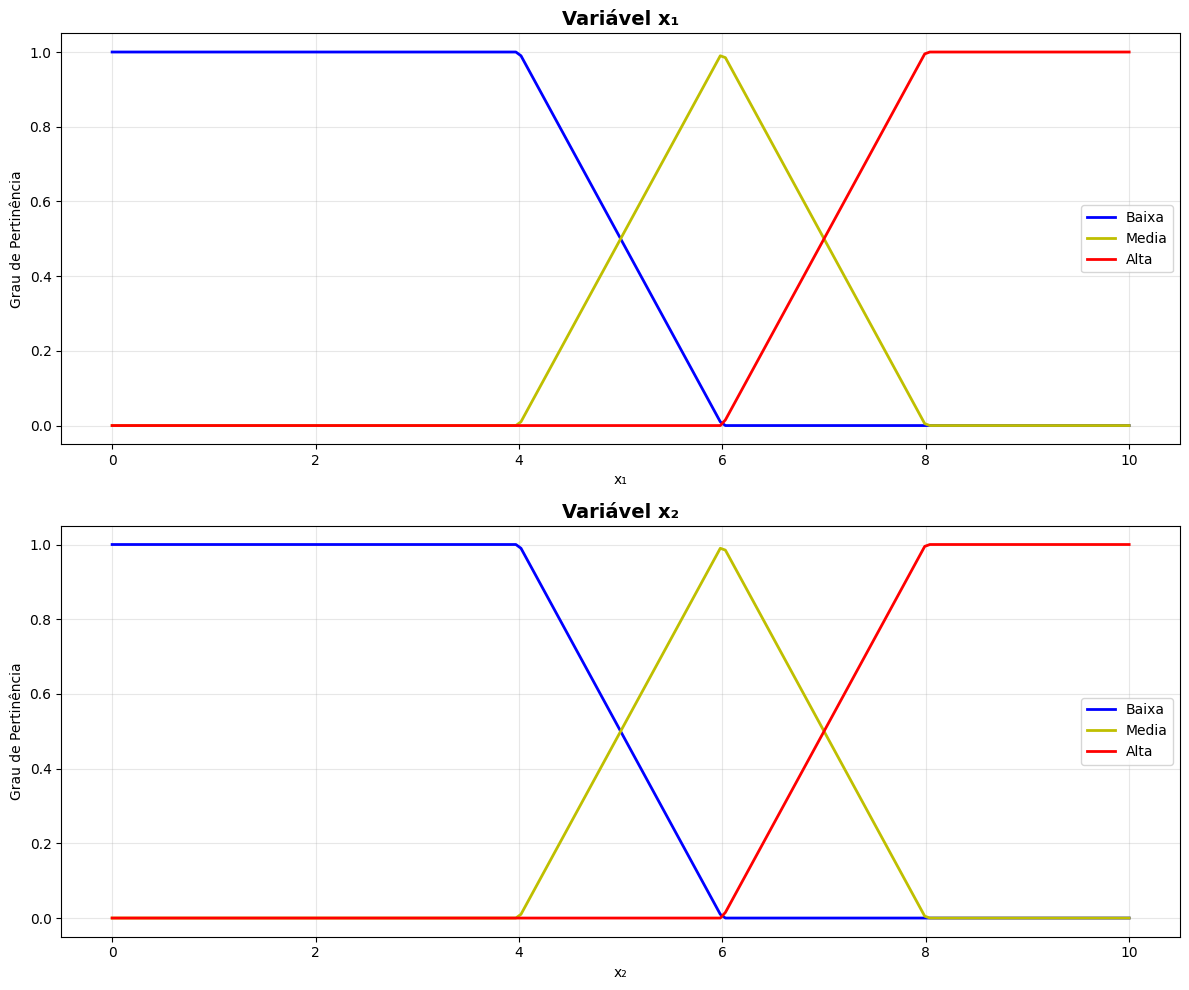

✅ Funções de pertinência visualizadas!


In [6]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

x_vals = np.linspace(0, 10, 200)
cores = {'baixa': 'b', 'media': 'y', 'alta': 'r'}

# x1
for term_name, term in sistema.input_variables['x1'].terms.items():
    mu = term.membership(x_vals)
    axes[0].plot(x_vals, mu, cores[term_name] + '-', linewidth=2, label=term_name.capitalize())

axes[0].set_title('Variável x₁', fontsize=14, fontweight='bold')
axes[0].set_xlabel('x₁')
axes[0].set_ylabel('Grau de Pertinência')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim([-0.05, 1.05])

# x2
for term_name, term in sistema.input_variables['x2'].terms.items():
    mu = term.membership(x_vals)
    axes[1].plot(x_vals, mu, cores[term_name] + '-', linewidth=2, label=term_name.capitalize())

axes[1].set_title('Variável x₂', fontsize=14, fontweight='bold')
axes[1].set_xlabel('x₂')
axes[1].set_ylabel('Grau de Pertinência')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim([-0.05, 1.05])

plt.tight_layout()
plt.show()

print('✅ Funções de pertinência visualizadas!')

## Base de Regras Sugeno Ordem 1

### 📜 Regras com Saídas Lineares:

1. **SE** x₁ é BAIXA **ENTÃO** y = 1 + 0.2·x₁ + 0.1·x₂
2. **SE** x₁ é MÉDIA **ENTÃO** y = 3 + 0.4·x₁ + 0.3·x₂
3. **SE** x₁ é ALTA **ENTÃO** y = 5 + 0.6·x₁ + 0.5·x₂

Cada regra define uma **função linear** das entradas!

In [ ]:
# ============================================================================
# Definir Regras com Saídas Lineares
# ============================================================================

# Para ordem 1, os coeficientes são: [p1, p2, ...,c]
# y = p1*x1 + p2*x2 + c

sistema.add_rules([
    ['baixa', 'baixa', [0.2, 0.1, 1.0]],
    ['media', 'media', [0.4, 0.3, 3.0]],
    ['alta',  'alta',  [0.6, 0.5, 5.0]]
])

print('📜 Base de Regras Sugeno Ordem 1:')
print('   R1: SE x₁ BAIXA → y = 0.2·x₁ + 0.1·x₂ + 1.0')
print('   R2: SE x₁ MÉDIA → y = 0.4·x₁ + 0.3·x₂ + 3.0')
print('   R3: SE x₁ ALTA  → y = 0.6·x₁ + 0.5·x₂ + 5.0')
print(f'\n✅ {len(sistema.rule_base)} regras definidas!')

TypeError: Formato inválido. Use:
  - add_rule(in1, in2, ..., out1, out2, ...)
  - add_rule((in1, in2, ..., out1, out2, ...))
  - add_rule([in1, in2], [out1, out2])
  - add_rule({'var': 'termo'}, {'var': 'termo'})
Recebeu: 4 argumentos

## Testar o Sistema

In [ ]:
# ============================================================================
# Teste: x₁=6.5, x₂=7.0
# ============================================================================

print('='*60)
print('🧪 TESTE: x₁=6.5, x₂=7.0')
print('='*60)

x1, x2 = 6.5, 7.0
resultado = sistema.evaluate({'x1': x1, 'x2': x2})
y = resultado['y']

print(f'\nEntradas: x₁={x1}, x₂={x2}')
print(f'Saída: y = {y:.3f}')

# Mostrar fuzzificação
graus_x1 = sistema.input_variables['x1'].fuzzify(x1)
print(f'\nGraus de pertinência (x₁={x1}):')
for termo, mu in graus_x1.items():
    print(f'  {termo}: {mu:.3f}')

print('='*60)

## Superfície de Controle 3D

Vejacom a superfície é **mais suave** que Ordem 0!

In [ ]:
print('🔄 Calculando superfície 3D...')

# Criar grid
x1_vals = np.linspace(0, 10, 40)
x2_vals = np.linspace(0, 10, 40)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Calcular saídas
Y = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        resultado = sistema.evaluate({'x1': X1[i,j], 'x2': X2[i,j]})
        Y[i,j] = resultado['y']

# Plotar
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X1, X2, Y, cmap='viridis', alpha=0.9)
ax1.set_xlabel('x₁')
ax1.set_ylabel('x₂')
ax1.set_zlabel('y')
ax1.set_title('Superfície 3D - Sugeno Ordem 1', fontweight='bold')
ax1.view_init(elev=25, azim=135)
fig.colorbar(surf, ax=ax1, shrink=0.5)

ax2 = fig.add_subplot(122)
contour = ax2.contourf(X1, X2, Y, levels=15, cmap='viridis')
ax2.set_xlabel('x₁')
ax2.set_ylabel('x₂')
ax2.set_title('Mapa de Contorno', fontweight='bold')
fig.colorbar(contour, ax=ax2)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print('✅ Superfície gerada!')
print('\n💡 Note que a superfície é mais suave que Ordem 0!')

## Comparação: Ordem 0 vs Ordem 1

Vamos comparar os dois métodos no mesmo problema (1 entrada).

In [ ]:
# Sistema Ordem 0
sistema_o0 = SugenoSystem(order=0)
sistema_o0.add_input('x', (0, 10))
sistema_o0.add_term('x', 'baixa', 'trapezoidal', (0, 0, 4, 6))
sistema_o0.add_term('x', 'media', 'triangular', (4, 6, 8))
sistema_o0.add_term('x', 'alta', 'trapezoidal', (6, 8, 10, 10))
sistema_o0.add_output('y')
sistema_o0.add_rules([
    ('baixa', 2.0),
    ('media', 6.0),
    ('alta', 9.0)
])

# Sistema Ordem 1
sistema_o1 = SugenoSystem(order=1)
sistema_o1.add_input('x', (0, 10))
sistema_o1.add_term('x', 'baixa', 'trapezoidal', (0, 0, 4, 6))
sistema_o1.add_term('x', 'media', 'triangular', (4, 6, 8))
sistema_o1.add_term('x', 'alta', 'trapezoidal', (6, 8, 10, 10))
sistema_o1.add_output('y')
sistema_o1.add_rules([
    ('baixa', [0.2, 1.0]),  # y = 1 + 0.2x
    ('media', [0.4, 3.0]),  # y = 3 + 0.4x
    ('alta', [0.6, 5.0])    # y = 5 + 0.6x
])

# Calcular curvas
x_vals = np.linspace(0, 10, 100)
y_ordem0 = [sistema_o0.evaluate({'x': x})['y'] for x in x_vals]
y_ordem1 = [sistema_o1.evaluate({'x': x})['y'] for x in x_vals]

plt.figure(figsize=(12, 6))
plt.plot(x_vals, y_ordem0, 'b-', linewidth=3, label='Sugeno Ordem 0')
plt.plot(x_vals, y_ordem1, 'r-', linewidth=3, label='Sugeno Ordem 1')
plt.xlabel('Entrada (x)', fontsize=12)
plt.ylabel('Saída (y)', fontsize=12)
plt.title('Comparação: Ordem 0 vs Ordem 1', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print('✅ Comparação visualizada!')
print('\n💡 Diferenças:')
print('   • Ordem 0: Curva com mudanças mais abruptas')
print('   • Ordem 1: Curva mais suave e flexível')
print('   • Ordem 1 pode modelar relações mais complexas')